## Examples of Eigendecomposition

This notebook contains some simple examples of eigendecomposition. 

### Example for simple 2x2 matrix

In [31]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
%matplotlib inline

A = np.array([[1,3], [3, 1]])
A

array([[1, 3],
       [3, 1]])

In [32]:
eigs, Q = np.linalg.eig(A)
print(np.diag(eigs))
print(Q)

[[ 4.  0.]
 [ 0. -2.]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [33]:
Q_inv = np.linalg.inv(Q)
print(Q_inv)
print(np.dot(Q, Q_inv))

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[[1.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00]]


In [34]:
np.dot(Q, np.dot(np.diag(eigs), np.transpose(Q)))

array([[1., 3.],
       [3., 1.]])

In [35]:
Cond_num = abs(eigs[0]/eigs[1])
Cond_num

1.999999999999999

### Eigenvalues and Rank

In [36]:
B = np.array([[3,-3,6],
            [2,-2,4],
            [1, -1, 2]])
print(B)

[[ 3 -3  6]
 [ 2 -2  4]
 [ 1 -1  2]]


In [37]:
B_eigs, B_Q = np.linalg.eig(B)
print(B_eigs)
print(B_Q)

[ 3.00000000e+00 -6.00567308e-17  3.57375398e-16]
[[ 8.01783726e-01 -6.17680277e-01  3.59935772e-16]
 [ 5.34522484e-01  5.35047449e-01 -8.94427191e-01]
 [ 2.67261242e-01  5.76363863e-01 -4.47213595e-01]]


In [38]:
Cond_num = abs(B_eigs[0]/B_eigs[2])
Cond_num

8394534203198758.0

### Example with Data

Text(0.5, 1.0, 'Sample data')

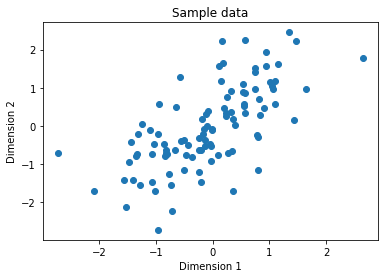

In [39]:
nr.seed(124)
cov = np.array([[1.0, 0.6], [0.6, 1.0]])
mean = np.array([0.0, 0.0])

sample = nr.multivariate_normal(mean, cov, 100)

plt.scatter(sample[:,0], sample[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Sample data')

In [40]:
cov_sample = np.matmul(np.transpose(sample), sample)
cov_sample

array([[ 81.00983399,  65.72792108],
       [ 65.72792108, 116.62580573]])

In [41]:
sample_eigs, sample_Q = np.linalg.eig(cov_sample)
print(sample_eigs)
print(sample_Q)

[ 30.72021366 166.91542606]
[[-0.79419984 -0.60765665]
 [ 0.60765665 -0.79419984]]
